# Assignment 2
Andrea Hassler  
Data Source: NYC OPEN DATA https://data.cityofnewyork.us/

In [1]:
# keep compatibility for python2 and python3
from __future__ import print_function
# import necessary modules
import os
import pandas as pd
import pylab as pl

## Step 1: Download dataset

In [2]:
# download dataset from portal using url given by "Export"
!curl https://data.cityofnewyork.us/api/views/ia2d-e54m/rows.csv?accessType=DOWNLOAD > nycwater.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1006    0  1006    0     0   6909      0 --:--:-- --:--:-- --:--:--  6937


## Step 2: Save dataset to PUIdata directory

In [3]:
# verify existence of PUIDATA environmental variable pointing to PUIdata
print("PUIdata", os.getenv("PUIDATA"))

PUIdata /nfshome/ah4412/PUIdata


In [4]:
# save dataset to PUIdata directory
!mv nycwater.csv $PUIDATA

In [5]:
# check dataset has been moved correctly
!ls $PUIDATA

nycwater.csv  test.txt


## Step 3: Read in dataset with pandas

In [6]:
# read in with pandas
water = pd.read_csv("%s/nycwater.csv"%os.getenv("PUIDATA"))

In [7]:
# print top 7 rows of the dataframe
water.head(7)

,Year,New York City Population,NYC Consumption(Million gallons per day),Per Capita(Gallons per person per day)
0,1979,7102100.0,1512.0,213
1,1980,7071639.0,1506.0,213
2,1981,7089241.0,1309.0,185
3,1982,7109105.0,1382.0,194
4,1983,7181224.0,1424.0,198
5,1984,7234514.0,1465.0,203
6,1985,7274054.0,1326.0,182


In [8]:
# print last 3 rows of dataframe
water.tail(3)

,Year,New York City Population,NYC Consumption(Million gallons per day),Per Capita(Gallons per person per day)
36,2015,8516502.0,1009.0,118
37,2016,8537673.0,1002.0,117
38,2017,8622698.0,990.2,115


In [9]:
# examine columns of dataframe
water.columns

Index(['Year', 'New York City Population',
       'NYC Consumption(Million gallons per day)',
       'Per Capita(Gallons per person per day)'],
      dtype='object')

In [10]:
# confirm number of columns
water.shape[1]

4

In [11]:
# check number of observations (rows)
water.shape[0]

39

In [12]:
# total number of entries (rows * columns)
water.size

156

In [13]:
# check date range
print(min(water["Year"]), max(water["Year"]), end="")

1979 2017

## Step 4: Reduct dataset to two numerical columns

In [14]:
# subset dataframe to two columns
water_2c = water[['New York City Population', 'NYC Consumption(Million gallons per day)']]

In [15]:
# confirm subsetting worked
water_2c.head()

,New York City Population,NYC Consumption(Million gallons per day)
0,7102100.0,1512.0
1,7071639.0,1506.0
2,7089241.0,1309.0
3,7109105.0,1382.0
4,7181224.0,1424.0


## Step 5: Plot remaining columns

In [16]:
# display plots embedded
%pylab inline

Populating the interactive namespace from numpy and matplotlib


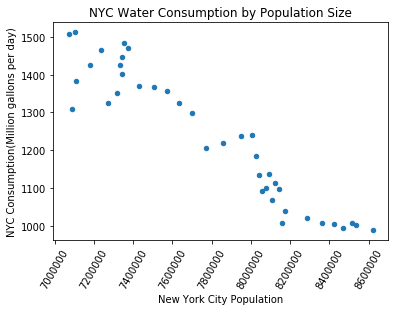

In [17]:
# create scatter plot with rotated tick marks on x-axis
water_2c.plot(x="New York City Population", y="NYC Consumption(Million gallons per day)", kind='scatter',
              title="NYC Water Consumption by Population Size", rot=60, fontsize=10)


Figure 1: NYC water consumption in million gallons per day plotted against NYC population size for years 1979 to 2017. Interestingly, there appears to be a strong negative correlation, in which increasing population size is associated with decreasing daily water consumption.